# Data Collection

# Dataset Description:
Date: Date set by a company on which the investor must own shares.\
Open: Open refers the starting period (day) of trading.\
High: High refers highest price at which a stock is traded during a period.\
Low: Low refers the minimum price of a stock in a period.\
Closed: Closed refers the price of an individual stock when the stock exchange closed shop for the day.\
Adj Close: Adj Close refers Adjusted closing price.\
Volume: Volume refers an indicator of liquidity.

## Import libraries

In [3]:
import os
import pandas as pd                 
import numpy as np                  
import matplotlib.pyplot as plt     
from pandas import Series,DataFrame
import seaborn as sns                
sns.set_style('whitegrid')
%matplotlib inline
import yfinance as yf
import pandas_datareader as pdr       
from datetime import datetime    

In [4]:
import yfinance as yf

tickers = ['GOOG', 'MSFT', 'AMZN']

start_date = "2015-02-08"
end_date = "2025-02-08"

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    print(f"Downloaded data for {ticker}")
    print(data.head())  
    data.to_csv(f'{ticker}_historical_data.csv')  

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Downloaded data for GOOG
Price           Close       High        Low       Open    Volume
Ticker           GOOG       GOOG       GOOG       GOOG      GOOG
Date                                                            
2015-02-09  26.163719  26.370420  26.074001  26.172145  25355423
2015-02-10  26.615286  26.652959  26.118610  26.236582  34997823
2015-02-11  26.567205  26.690136  26.438723  26.533994  27555446
2015-02-12  26.912201  27.005886  26.502915  26.630654  32404724
2015-02-13  27.213579  27.258190  26.922116  26.933022  38006060


[*********************100%***********************]  1 of 1 completed


Downloaded data for MSFT
Price           Close       High        Low       Open    Volume
Ticker           MSFT       MSFT       MSFT       MSFT      MSFT
Date                                                            
2015-02-09  36.234928  36.559983  36.106616  36.132281  31381100
2015-02-10  36.440224  36.585644  36.080955  36.559983  29670700
2015-02-11  36.252029  36.482989  36.106609  36.482989  38262500
2015-02-12  36.859371  36.859371  36.363235  36.491547  33268800
2015-02-13  37.526588  37.526588  36.910700  37.107442  40264900


[*********************100%***********************]  1 of 1 completed

Downloaded data for AMZN
Price           Close       High        Low       Open    Volume
Ticker           AMZN       AMZN       AMZN       AMZN      AMZN
Date                                                            
2015-02-09  18.528000  18.720501  18.360001  18.549999  54492000
2015-02-10  18.650000  18.715000  18.425501  18.559500  45744000
2015-02-11  18.757000  18.855000  18.555000  18.561501  55730000
2015-02-12  18.858500  18.925501  18.657499  18.754999  55822000
2015-02-13  19.091499  19.150000  18.850500  18.920500  69502000


In [9]:
tickers = ['GOOG', 'MSFT', 'AMZN']
start_date = "2015-02-08"
end_date = "2025-02-08"

data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# Reformat column names to avoid multi-index issue
combined_data = pd.DataFrame()
for ticker in tickers:
    stock_data = data[ticker].copy()  
    stock_data.columns = [f"{ticker}_{col}" for col in stock_data.columns]  
    combined_data = pd.concat([combined_data, stock_data], axis=1)  

combined_data.to_csv('combined_stock_data.csv')

print("Data downloaded, merged, and saved successfully!")
print(combined_data.head())  

[*********************100%***********************]  3 of 3 completed

Data downloaded, merged, and saved successfully!
            GOOG_Open  GOOG_High   GOOG_Low  GOOG_Close  GOOG_Volume  \
Date                                                                   
2015-02-09  26.172145  26.370420  26.074001   26.163719     25355423   
2015-02-10  26.236582  26.652959  26.118610   26.615286     34997823   
2015-02-11  26.533994  26.690136  26.438723   26.567205     27555446   
2015-02-12  26.630654  27.005886  26.502915   26.912201     32404724   
2015-02-13  26.933022  27.258190  26.922116   27.213579     38006060   

            MSFT_Open  MSFT_High   MSFT_Low  MSFT_Close  MSFT_Volume  \
Date                                                                   
2015-02-09  36.132281  36.559983  36.106616   36.234928     31381100   
2015-02-10  36.559983  36.585644  36.080955   36.440224     29670700   
2015-02-11  36.482989  36.482989  36.106609   36.252029     38262500   
2015-02-12  36.491547  36.859371  36.363235   36.859371     33268800   
2015-02-13  37

In [13]:
combined_data.sample(10)

,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,GOOG_Volume,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Volume,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Volume
Date,,,,,,,,,,,,,,,
2015-03-02,27.784607,28.360592,27.696375,28.320442,42592618,37.621346,38.069322,37.517967,37.802261,31924000,19.042500,19.295000,18.974001,19.283001,42784000
2017-02-27,40.983888,41.279631,40.956550,41.218990,22030000,58.620141,58.620141,58.175087,58.338577,15871500,42.118999,42.625000,41.983501,42.431999,54272000
2016-11-07,38.496167,39.027509,38.399243,38.894798,31702000,53.607419,54.271012,53.607419,54.181335,31664800,38.582001,39.386501,38.547001,39.246498,119688000
2020-07-13,77.042052,78.390634,74.817429,75.120476,36928000,205.490180,206.754860,197.844662,198.390778,38135600,162.552994,167.214493,153.419495,155.199997,154408000
2017-02-15,40.725920,40.906848,40.681684,40.707035,26272000,58.583814,58.647393,58.275003,58.611061,17005200,41.700001,42.140499,41.640999,42.134998,59378000
2019-02-28,55.236662,56.049333,55.222248,55.665115,30850000,105.647997,106.440070,105.355685,105.638565,29083900,81.762497,82.588501,81.691498,81.991501,60518000
2024-05-28,174.701552,177.455173,174.641894,176.968079,15655300,426.361115,427.542064,423.354171,427.045868,15718000,179.929993,182.240005,179.490005,182.149994,29927000
2024-06-24,180.413873,181.210054,179.368887,179.926208,18198300,446.377654,449.305221,443.013463,444.263885,15913700,189.330002,191.000000,185.330002,185.570007,50610400
2022-05-27,109.139760,112.201062,108.902675,112.132477,29924000,261.838184,266.577940,260.940930,266.480408,26910800,113.550003,115.186996,112.627998,115.146500,93660000


## Check For Missing Values

In [16]:
# Check for missing values in the dataset
missing_values = combined_data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Check total missing values
total_missing = combined_data.isnull().sum().sum()
print(f"\nTotal missing values in the dataset: {total_missing}")

Missing Values in Each Column:
 GOOG_Open      0
GOOG_High      0
GOOG_Low       0
GOOG_Close     0
GOOG_Volume    0
MSFT_Open      0
MSFT_High      0
MSFT_Low       0
MSFT_Close     0
MSFT_Volume    0
AMZN_Open      0
AMZN_High      0
AMZN_Low       0
AMZN_Close     0
AMZN_Volume    0
dtype: int64

Total missing values in the dataset: 0


## Basic Statistical Summary - Descriptive Statistics

In [21]:
print(combined_data.describe())

         GOOG_Open    GOOG_High     GOOG_Low   GOOG_Close   GOOG_Volume  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2.516000e+03   
mean     83.965883    84.872144    83.138876    84.020243  3.047934e+07   
std      45.358793    45.878835    44.903007    45.384219  1.522968e+07   
min      25.821515    25.982257    25.606793    25.688801  6.809800e+06   
25%      46.722276    47.004719    46.310660    46.831504  2.106750e+07   
50%      66.247715    67.106982    65.609758    66.434105  2.674095e+07   
75%     122.772717   124.022791   121.477922   122.592165  3.529500e+07   
max     204.022044   208.212225   203.782599   207.224548  2.232980e+08   

         MSFT_Open    MSFT_High     MSFT_Low   MSFT_Close   MSFT_Volume  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2.516000e+03   
mean    185.095889   186.851801   183.252679   185.138488  2.865284e+07   
std     124.869525   125.948898   123.683324   124.868573  1.297504e+07   
min      34.752568    35

## Visualizing Stock Price Trends Over Time

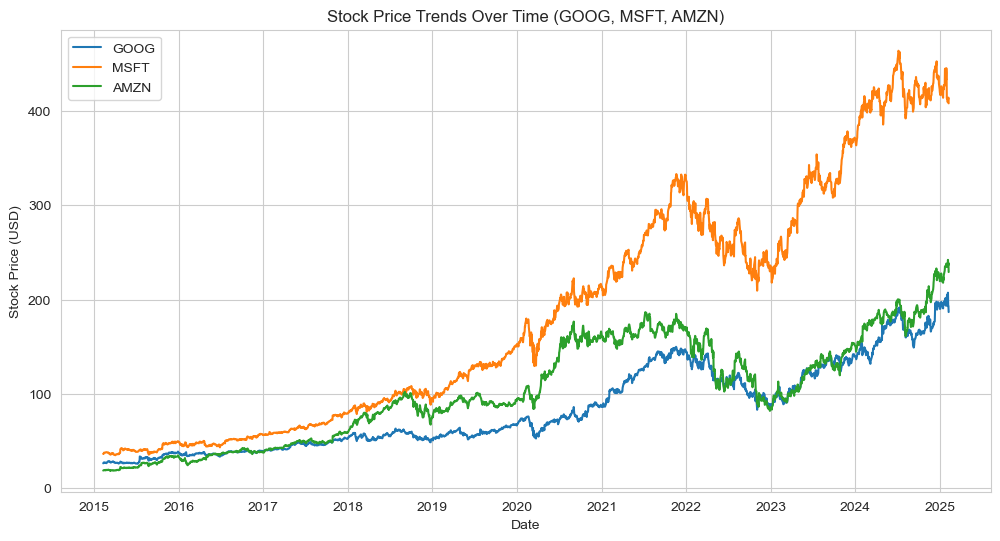

In [23]:
plt.figure(figsize=(12, 6))

# Plot each stock's closing price
for ticker in tickers:
    plt.plot(combined_data.index, combined_data[f'{ticker}_Close'], label=ticker)

plt.title("Stock Price Trends Over Time (GOOG, MSFT, AMZN)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

## Moving Average (Trend Analysis)

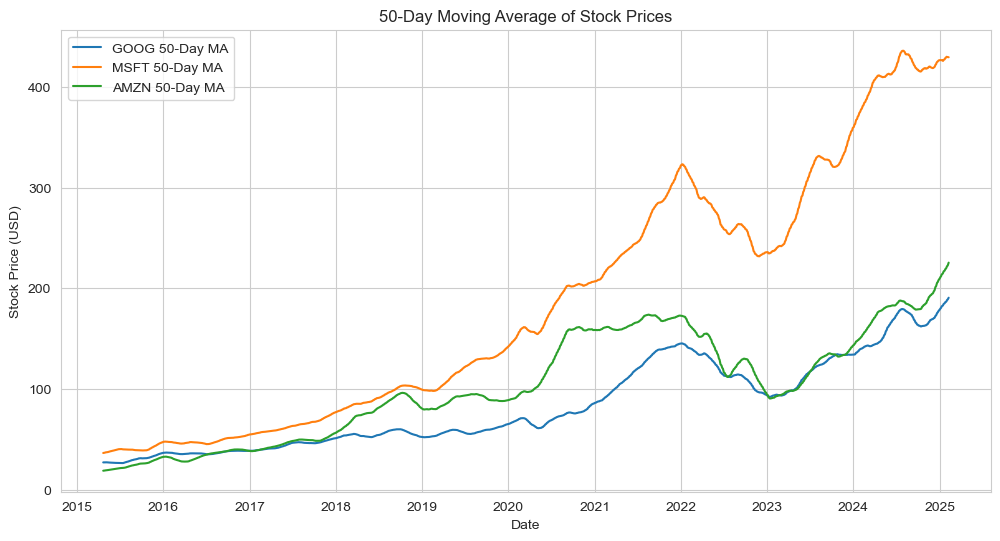

In [31]:
plt.figure(figsize=(12, 6))

for ticker in tickers:
    combined_data[f"{ticker}_50MA"] = combined_data[f"{ticker}_Close"].rolling(window=50).mean()
    
    plt.plot(combined_data.index, combined_data[f"{ticker}_50MA"], label=f"{ticker} 50-Day MA")

plt.title("50-Day Moving Average of Stock Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

## Correlation Matrix

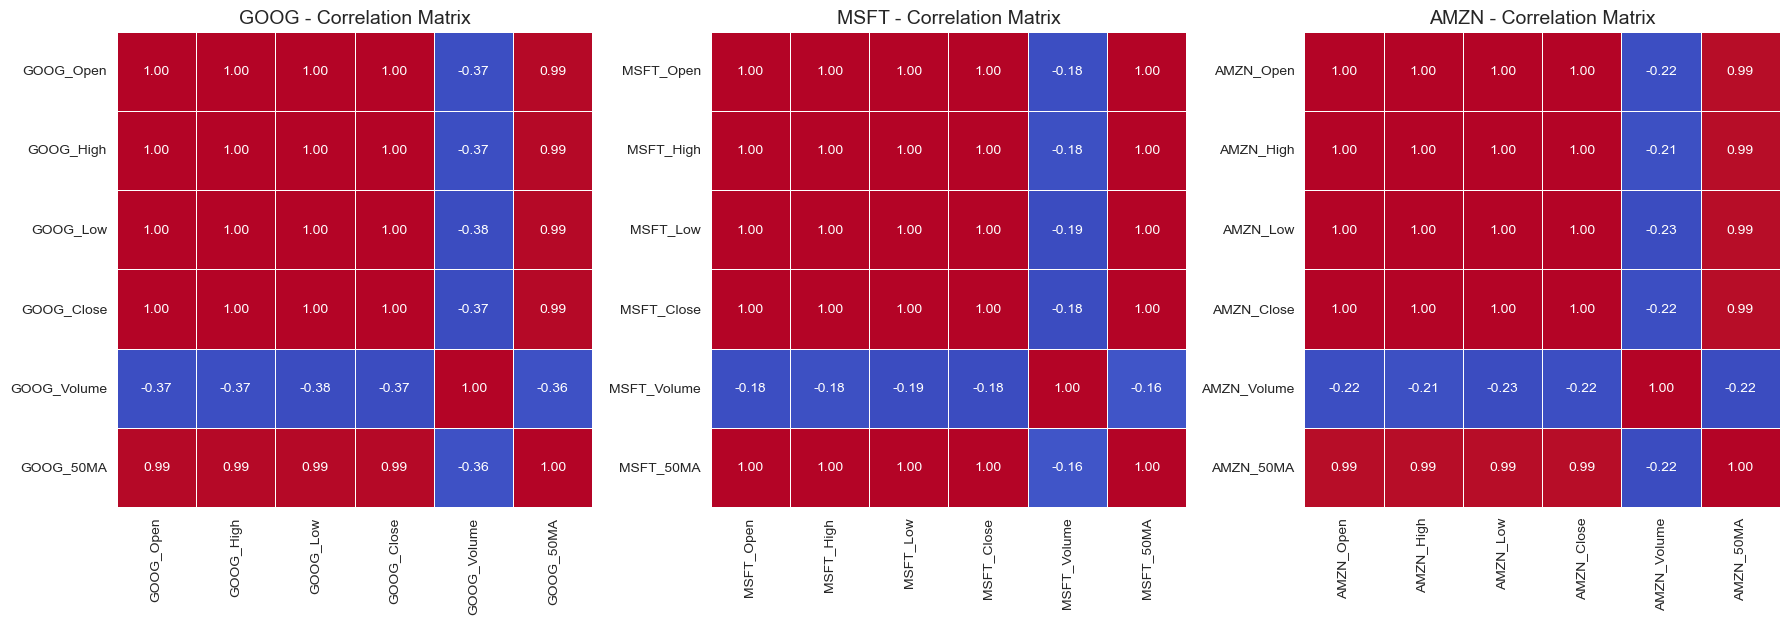

In [36]:
tickers = ['GOOG', 'MSFT', 'AMZN']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6)) 

for i, ticker in enumerate(tickers):
    ticker_data = combined_data.filter(like=ticker)
    
    corr_matrix = ticker_data.corr()

    # Plot heatmap
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, 
                ax=axes[i], square=True, cbar=False)  

    axes[i].set_title(f"{ticker} - Correlation Matrix", fontsize=14)

plt.tight_layout()
plt.show()

## Histogram of Closing Price

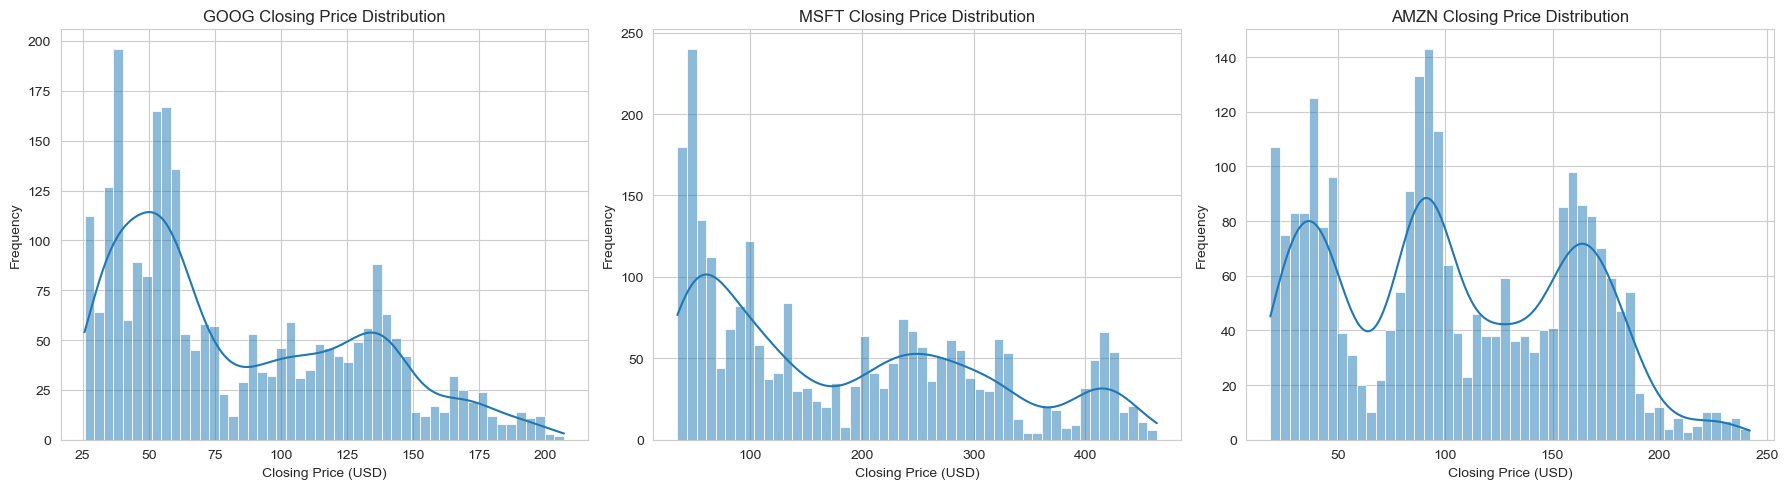

In [41]:
plt.figure(figsize=(18, 5))

for i, ticker in enumerate(tickers):
    plt.subplot(1, 3, i+1)  
    sns.histplot(combined_data[f"{ticker}_Close"], bins=50, kde=True)
    plt.title(f"{ticker} Closing Price Distribution")
    plt.xlabel("Closing Price (USD)")
    plt.ylabel("Frequency")

plt.tight_layout()  
plt.show()

## Outlier of Close Price

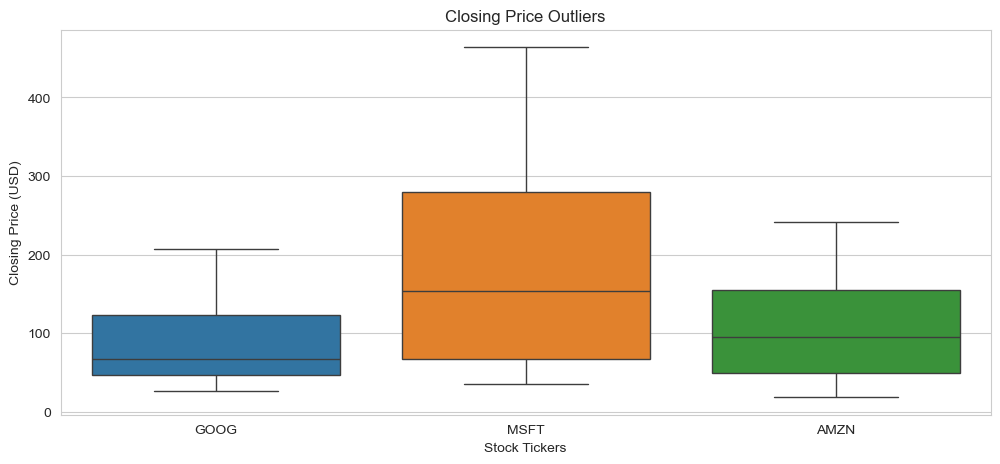

In [44]:
plt.figure(figsize=(12, 5))

sns.boxplot(data=combined_data[[f"{ticker}_Close" for ticker in tickers]])

plt.title("Closing Price Outliers")
plt.xlabel("Stock Tickers")
plt.ylabel("Closing Price (USD)")
plt.xticks(ticks=[0, 1, 2], labels=tickers)  # Label tickers
plt.show()